# Impact Factor

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

plt.rc('text', usetex=True)

In [2]:
df = pd.read_csv('../data/citations.csv') # read data

In [3]:
# Names of journals. 
journals = ['All journals', 'SCIENTIFIC REPORTS', 'SCIENCE', 
     'PROCEEDINGS OF THE ROYAL SOCIETY B-BIOLOGICAL SCIENCES', 
     'PLOS ONE', 'PLOS GENETICS','PLOS BIOLOGY', 
     'NATURE COMMUNICATIONS', 'NATURE', 'JOURNAL OF INFORMETRICS',
     'EMBO JOURNAL', 'eLife']
journals.sort()

In [4]:
# Where the power law starts for each journal.
m = {'All journals':2, 'SCIENTIFIC REPORTS':3, 'SCIENCE':4, 
     'PROCEEDINGS OF THE ROYAL SOCIETY B-BIOLOGICAL SCIENCES':2, 
     'PLOS ONE': 2, 'PLOS GENETICS': 3,'PLOS BIOLOGY':3, 
     'NATURE COMMUNICATIONS':3, 'NATURE':5, 'JOURNAL OF INFORMETRICS':1 ,
     'EMBO JOURNAL':3, 'eLife':3}

In [5]:
def calculate_exponent(journal):
    if journal == 'All journals':
        citations = df.Citations
    else:
        citations = df.Citations[df.Journal == journal]+1
    # Calculate imperical probability distribution.
    prob, bins = np.histogram(citations, 
                              bins= 2**np.arange(0,int(np.ceil(np.log2(citations.max())))+1), 
                              normed=True)
    
    # Fit a power law.
    lr = LinearRegression()
    lr.fit(np.log(bins[m[journal]:-1].reshape(-1,1)),np.log(prob[m[journal]:]))
    alpha = -lr.coef_[0]
    R2 = lr.score(np.log(bins[m[journal]:-1].reshape(-1,1)),np.log(prob[m[journal]:]))
    
    # Given the power law, make some predictions. 
    x = np.arange(0.1, 1000,0.1).reshape(-1,1)
    y = np.exp(lr.predict(np.log(x)))
    
    #plt.axvline(citations.mean(), color = 'grey')
    #plt.axvline(citations.median())
        
    plt.loglog(bins[:-1], prob, 'o') # plot the data
    plt.plot(x,y) # plot a line
    plt.plot(bins[m[journal]], prob[m[journal]], 'ro') # The data form this point have been used to fit power law. 
    plt.xlim(0.9,1000)
    plt.ylim(10**-5,1)
        
    plt.annotate(r"$\alpha = 1+"+str(np.round(alpha, 2))+"$", (10**2,10**-1), fontsize=14)

    return alpha, R2

## Results

Probability Density Function of all journals together and each individual journal, using a geometric bin, the exponent are displayed in the form of $\alpha = 1+\alpha'$, whre $\alpha'$ is the exponent of the binned data and $\alpha$ is the exponent of original data (see section Geometric bin size).

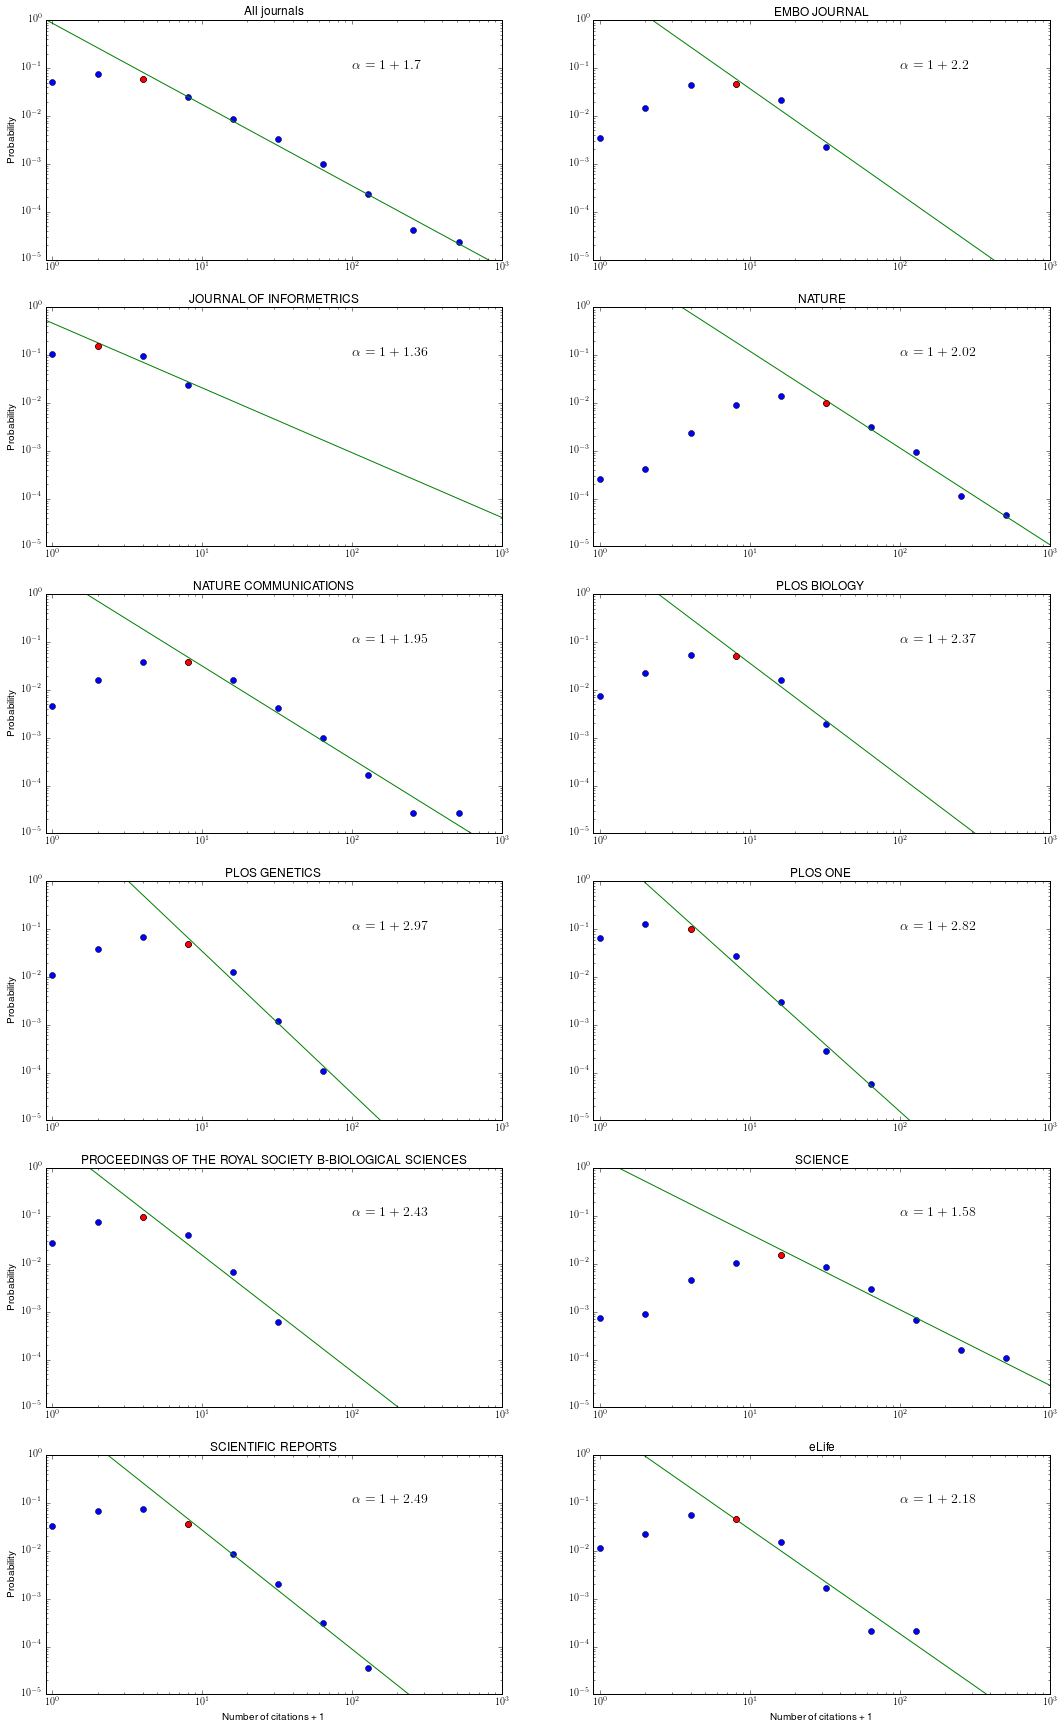

In [6]:
plt.rcParams['figure.figsize'] = 18, 30
i=0
for journal in journals:
    i+=1
    plt.subplot(6,2,i)
    #print(journal)
    alpha, R2 = calculate_exponent(journal)
    #print(journal, alpha)
    if i > 10:
        plt.xlabel('Number of citations + 1')
    if i%2 == 1:
        plt.ylabel('Probability')
    #plt.xlim(1,bins[-1])
    #plt.ylim(10**-5,1)
    plt.title(journal);
    
plt.show()

## Mean and variance of power-law


A power-law is defined as follow:

$$\begin{align}
p(x)&= \frac{\alpha-1}{x_{min}^{1-\alpha}} x^{-\alpha} \\
\langle x^m \rangle&= \frac{\alpha-1}{x_{min}^{1-\alpha}}\int_{x_{min}}^{\infty} x^{m-\alpha}
\end{align}
$$

This is only true if $(m +1) < \alpha $, if not, the above integral will diverge. This is the case for all journals together and some journals including **Science**, the variance is **diverging**. 

## Geometric bin size

Using geometric bins to make histogram gives us a new power-law distribution with exponent $\alpha'$, where $\alpha = \alpha'+1$

$$ 
\begin{align}
p(2^n \le x < 2^{n+1})&= \frac{\alpha-1}{x_{min}^{1-\alpha}}\int_{2^n}^{2^{n+1}} x^{-\alpha} \\
&=-\frac{1}{x_{min}^{1-\alpha}}x^{1-\alpha}\mid_{2^n}^{2^{n+1}} \\
&=-\frac{1}{x_{min}^{1-\alpha}}(2^{(n+1)(1-\alpha)}-2^{n(1-\alpha)}) \\
&= \frac{(1 - 2^{1-\alpha})}{x_{min}^{1-\alpha}} 2^{n(1-\alpha)}
\end{align}
$$

Replacing $2^n$ with $X$ and $1-\alpha$ with $\alpha'$ gives

$$ = \frac{(1 - 2^{1-\alpha})}{x_{min}^{1-\alpha}} X^{-\alpha'}$$, 

Which is a power-law as well.
